In [2]:
%matplotlib inline
import cmath
import matplotlib.pyplot as plt
import numpy as np

In [74]:
EPS = 1e-12
N = 200
n_lines = 20

In [79]:
def plot_transform_polar(T):
    max_r = 3.0
    cm1 = plt.cm.get_cmap('Reds', n_lines)
    cm1 = [cm1(i) for i in range(n_lines)]
    cm2 = plt.cm.get_cmap('Blues', n_lines)
    cm2 = [cm2(i) for i in range(n_lines)]

    f = plt.figure(figsize=(40, 20))

    ax1 = f.add_subplot(121, projection='polar')
    ax1.set_rticks([])
    ax1.set_xticks([])

    ax2 = f.add_subplot(122, projection='polar')
    ax2.set_rticks([])
    ax2.set_xticks([])
    
    def plot_and_map(ts, rs, c):
        ax1.plot(ts, rs, color=c)
        mapped_points = [cmath.polar(T(cmath.rect(r, t))) for r, t in zip(rs, ts)]
        ax2.plot(
            [result[1] for result in mapped_points],
            [result[0] for result in mapped_points],
            color=c,
            marker='.',
            linestyle='',
        )

    # rays
    thetas = np.arange(0, 2 * np.pi, 2 * np.pi / n_lines)
    rs = np.arange(EPS, max_r, max_r / N)
    for t, c in zip(thetas, cm1):
        ts = np.repeat(t, N)
        plot_and_map(ts, rs, c)

    # circles
    radii = np.arange(EPS, max_r, 0.2) # why doesn't max_r / n_lines work?
    ts = np.arange(0, 2 * np.pi, 2 * np.pi / N)
    for r, c in zip(radii, cm2):
        rs = np.repeat(r, N)
        plot_and_map(ts, rs, c)

    ax1.set_rmax(max_r)
    ax2.set_rmax(max_r)
    plt.show()

In [80]:
def plot_transform_cartesian(T):
    max_x = 3.0
    cm1 = plt.cm.get_cmap('Reds', n_lines)
    cm1 = [cm1(i) for i in range(n_lines)]
    cm2 = plt.cm.get_cmap('Blues', n_lines)
    cm2 = [cm2(i) for i in range(n_lines)]

    f = plt.figure(figsize=(40, 20))

    ax1 = f.add_subplot(121)
    ax1.set_yticks([])
    ax1.set_xticks([])

    ax2 = f.add_subplot(122)
    ax2.set_yticks([])
    ax2.set_xticks([])
    
    def plot_and_map(xs, ys, c):
        ax1.plot(xs, ys, color=c)
        mapped_points = [T(complex(x, y)) for x, y in zip(xs, ys)]
        ax2.plot(
            [result.real for result in mapped_points],
            [result.imag for result in mapped_points],
            color=c,
            marker='.',
            linestyle='',
        )

    # verticals
    all_xs = np.arange(-max_x, max_x, 2 * max_x / n_lines)
    ys = np.arange(-max_x, max_x, 2 * max_x / N)
    for x, c in zip(all_xs, cm1):
        xs = np.repeat(x, N)
        plot_and_map(xs, ys, c)

    # horizontals
    all_ys = np.arange(-max_x, max_x, 2 * max_x / n_lines)
    xs = np.arange(-max_x, max_x, 2 * max_x / N)
    for y, c in zip(all_ys, cm2):
        ys = np.repeat(y, N)
        plot_and_map(xs, ys, c)

    ax1.set_xlim((-max_x, max_x))
    ax1.set_ylim((-max_x, max_x))
    ax2.set_xlim((-max_x, max_x))
    ax2.set_ylim((-max_x, max_x))
    plt.show()

In [81]:
def plot_transform(T):
    """Plot the effect of complex map T on polar and cartesian grids"""
    plot_transform_polar(T)
    plot_transform_cartesian(T)

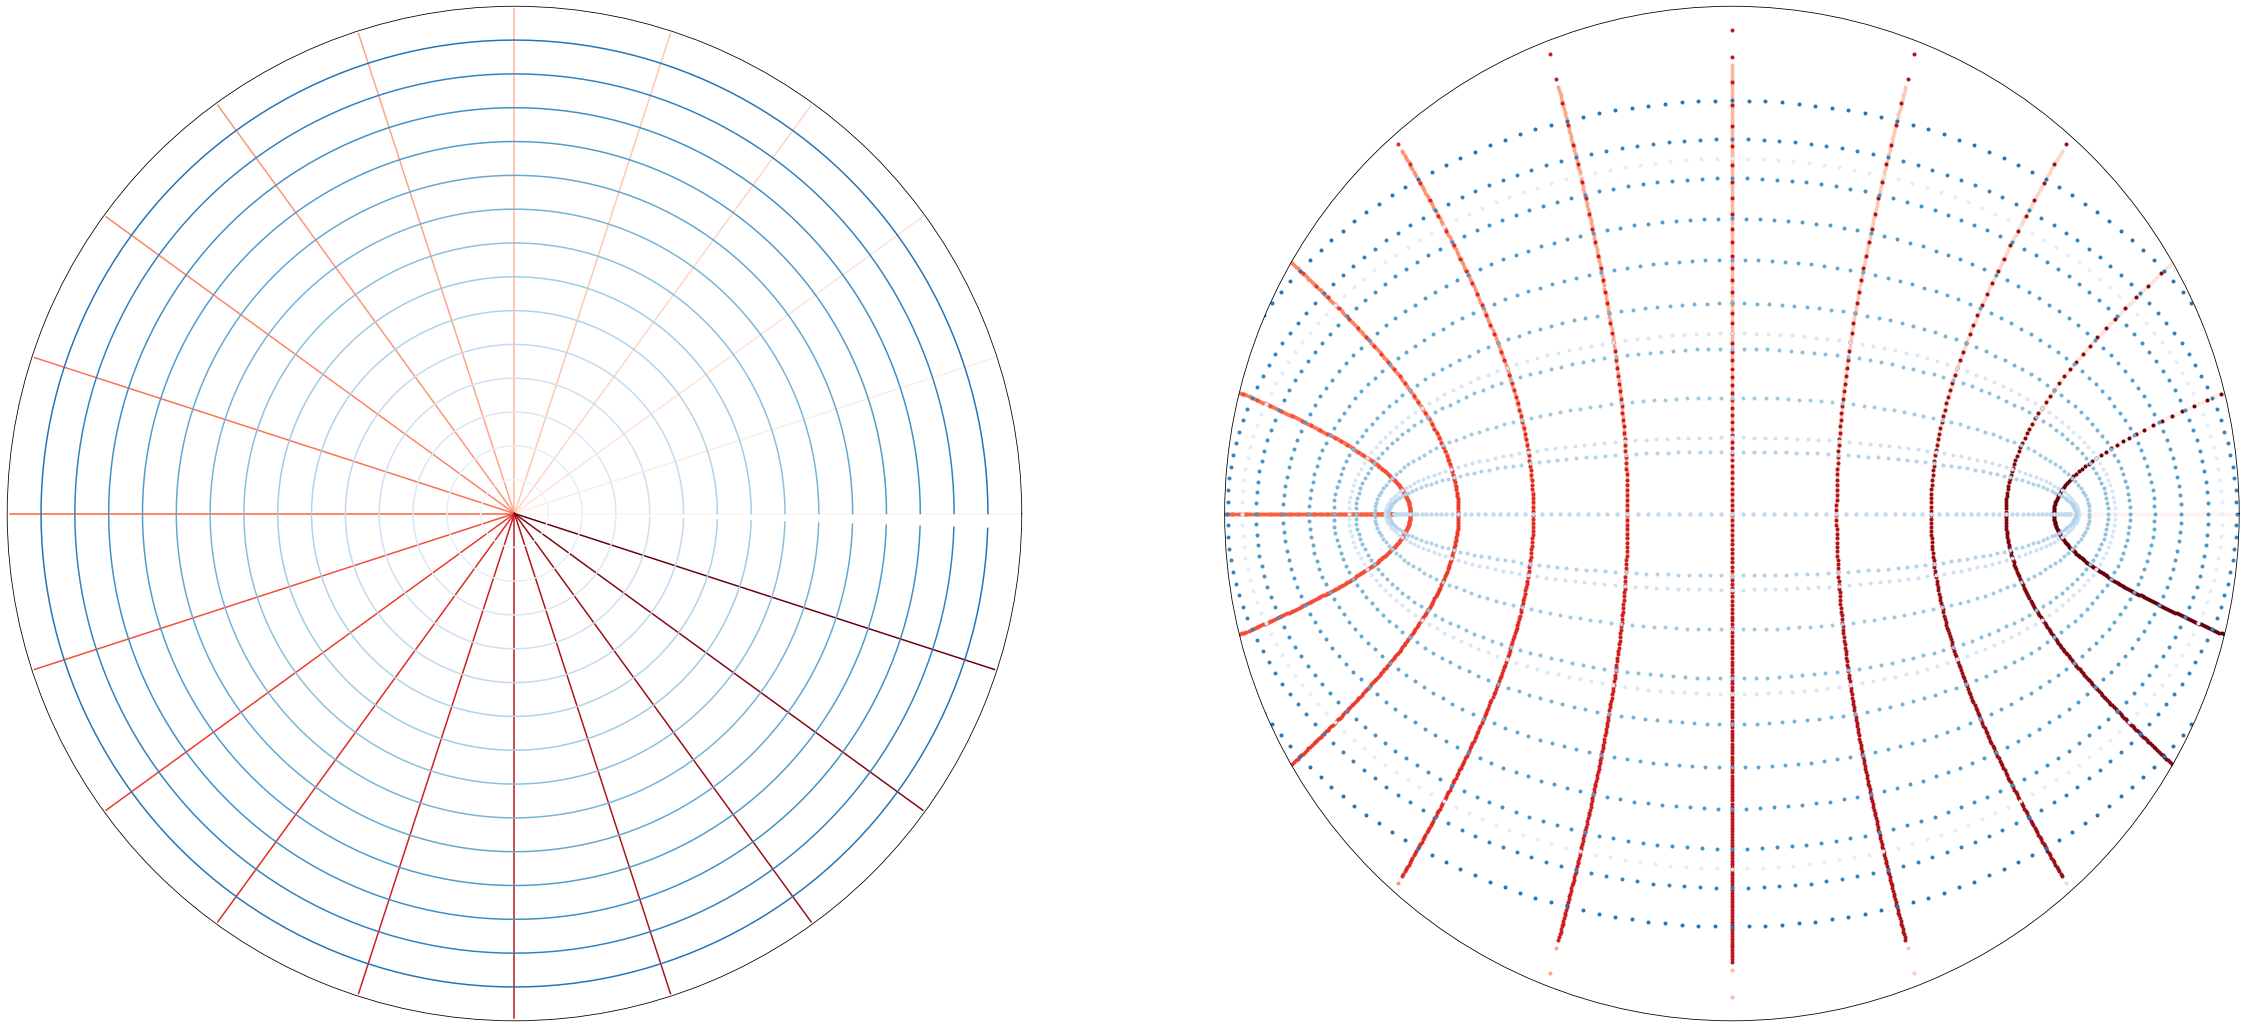

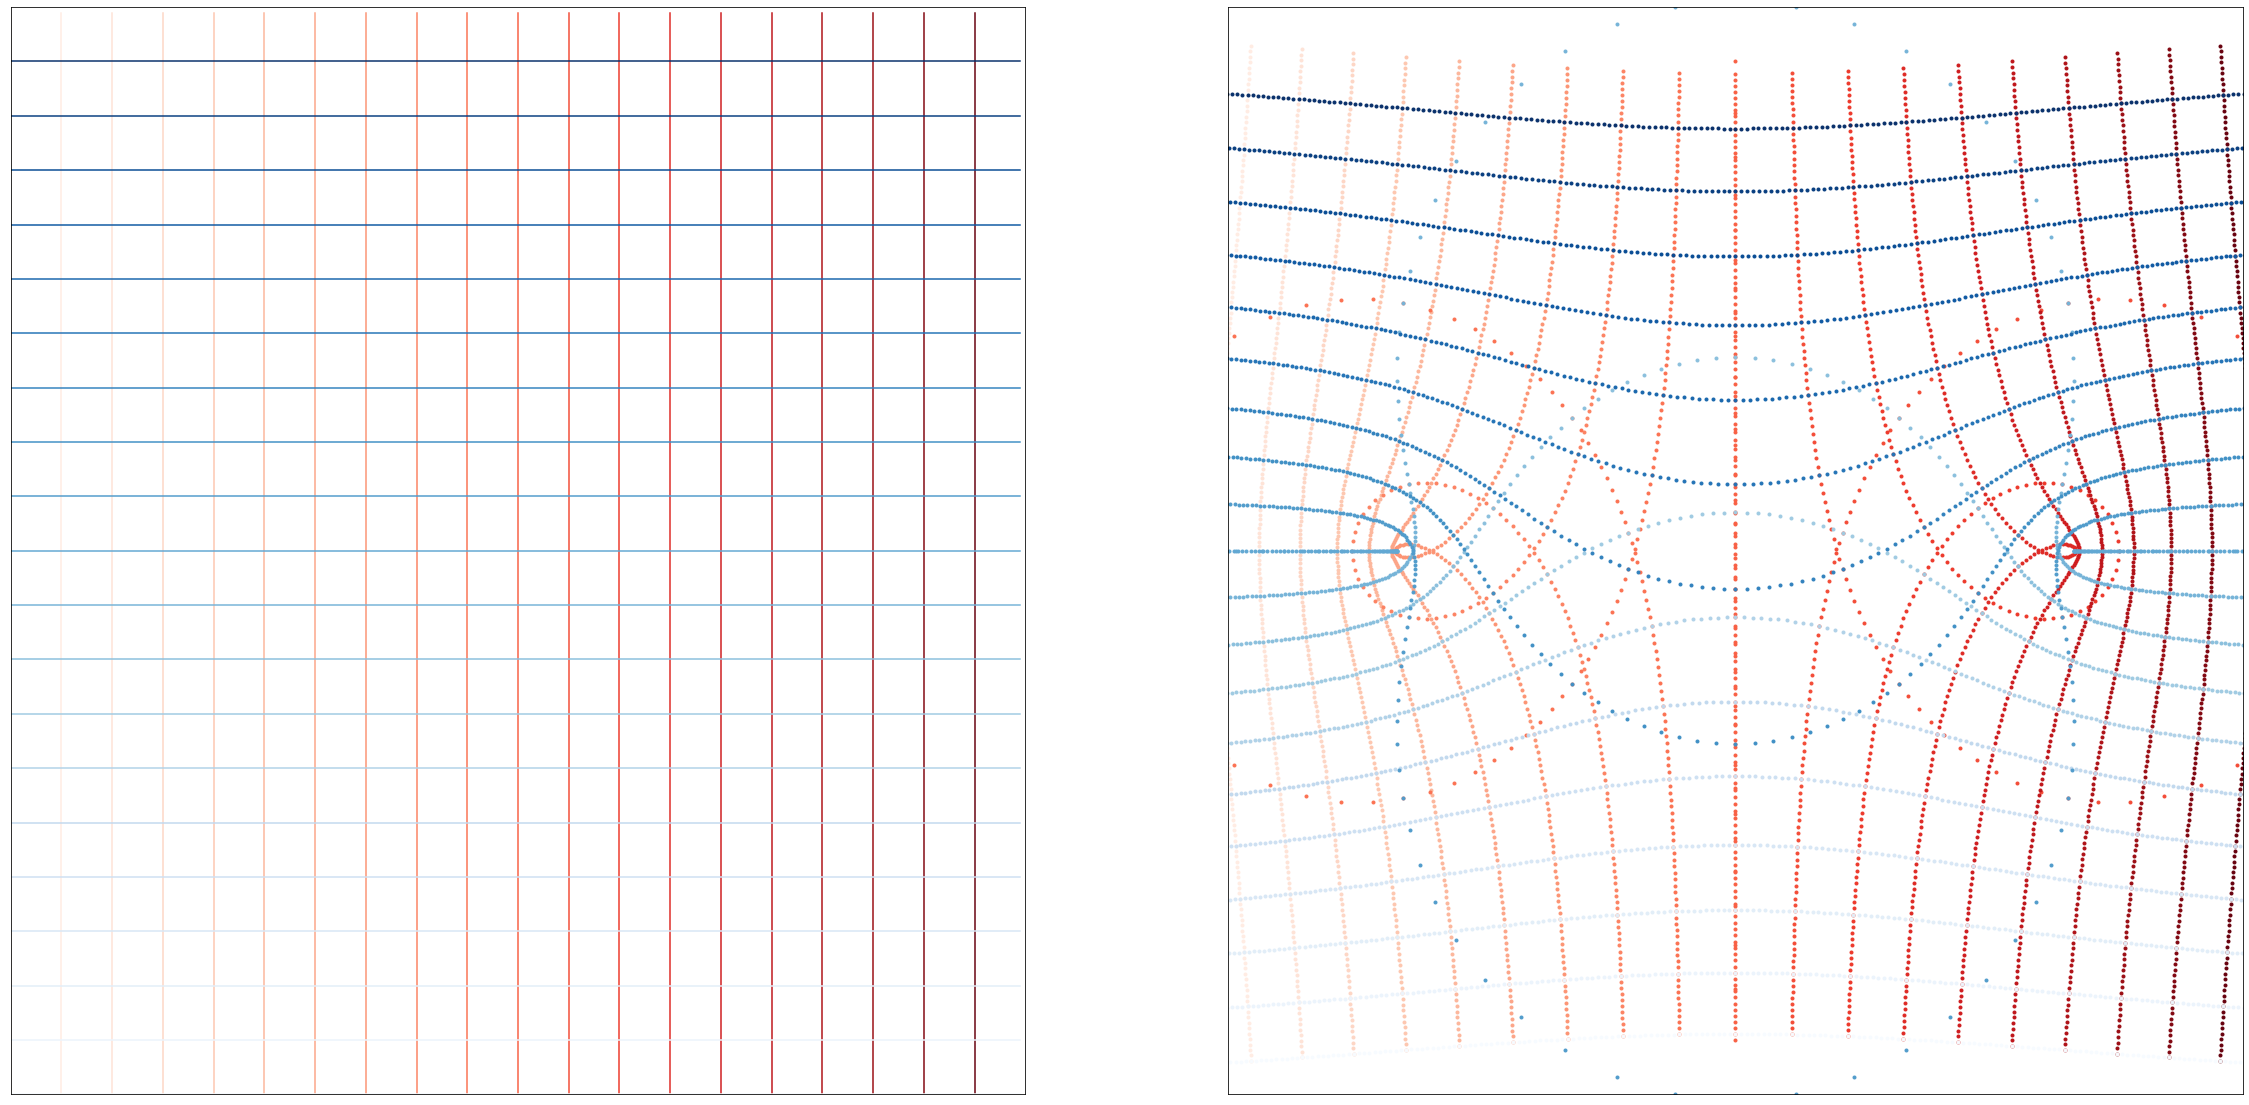

In [82]:
plot_transform(lambda z: z + 1 / z)

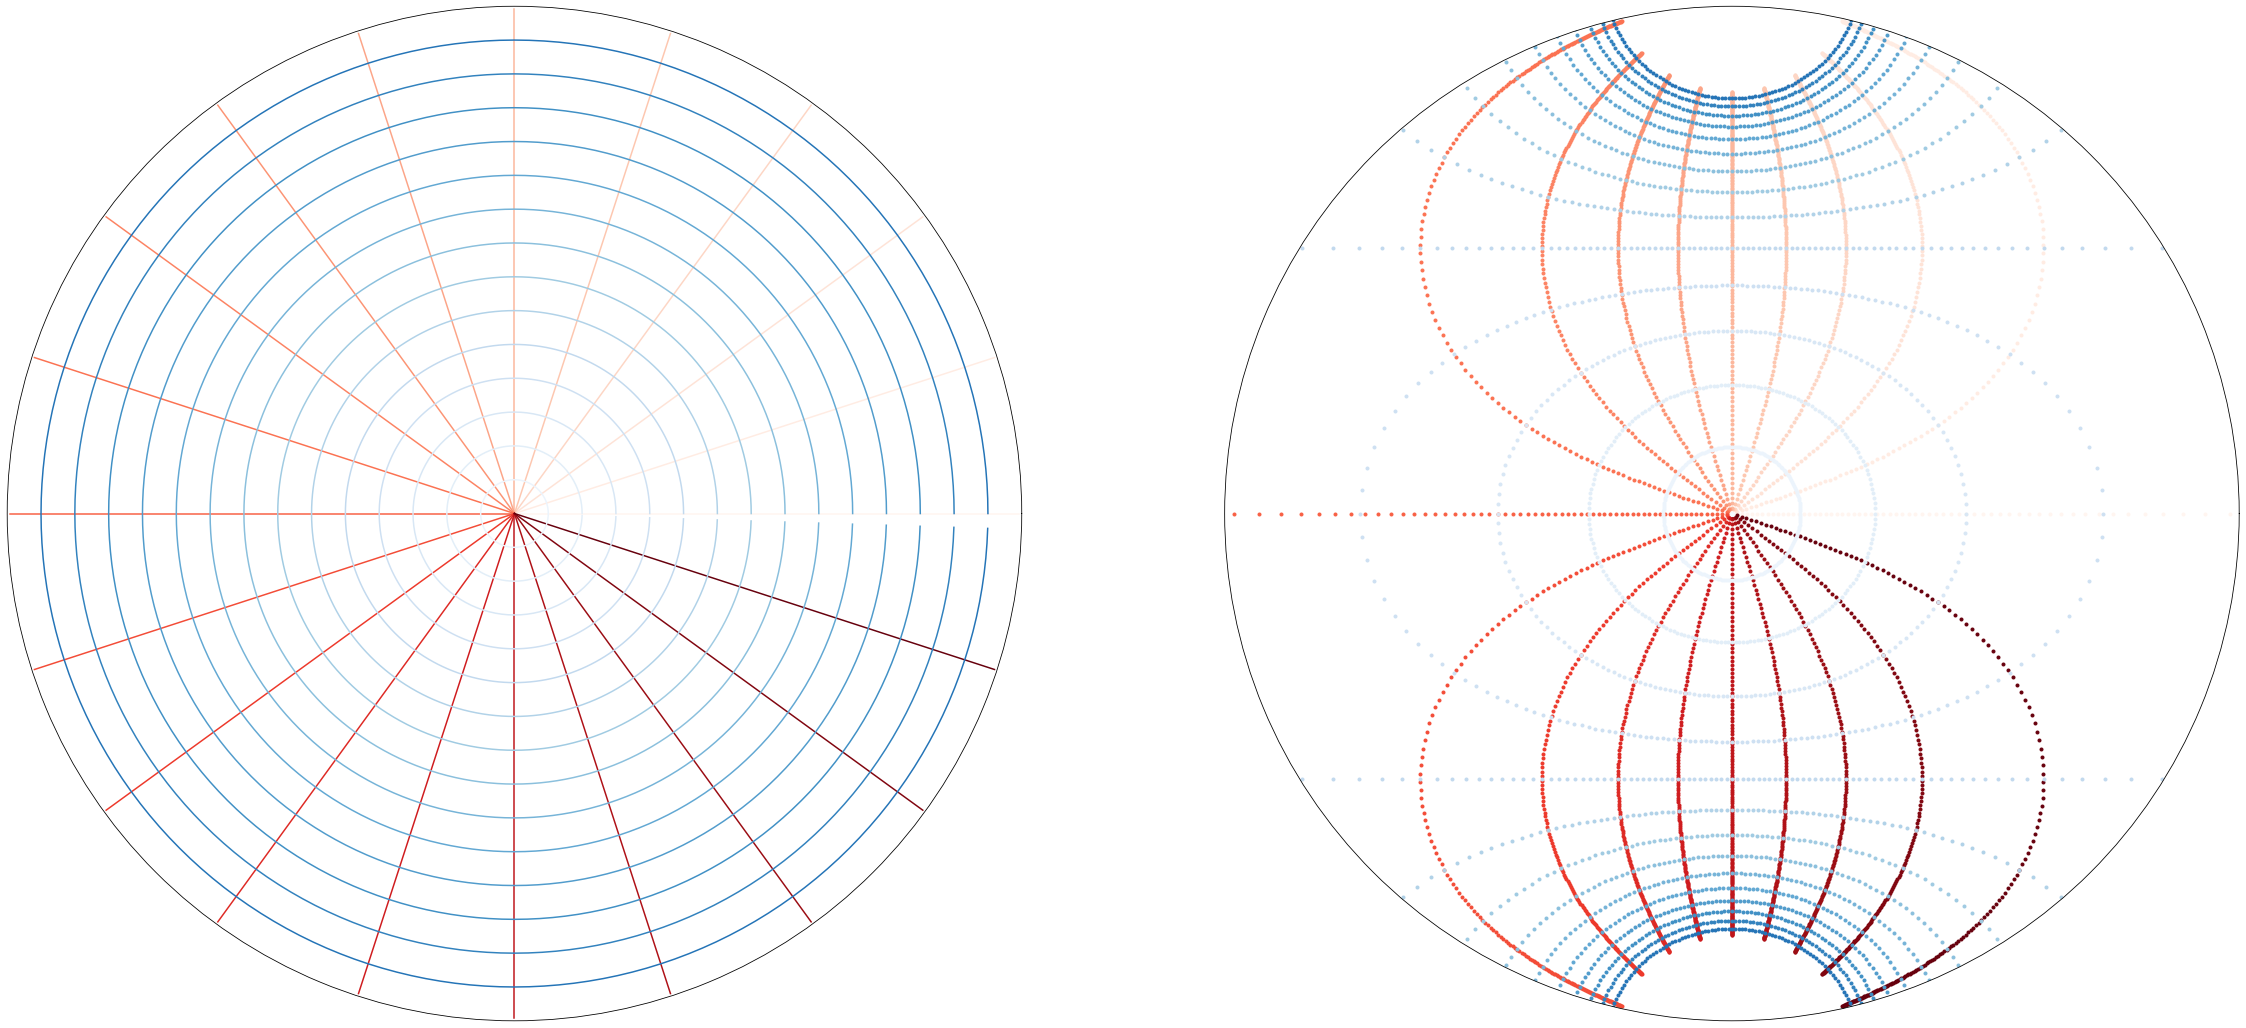

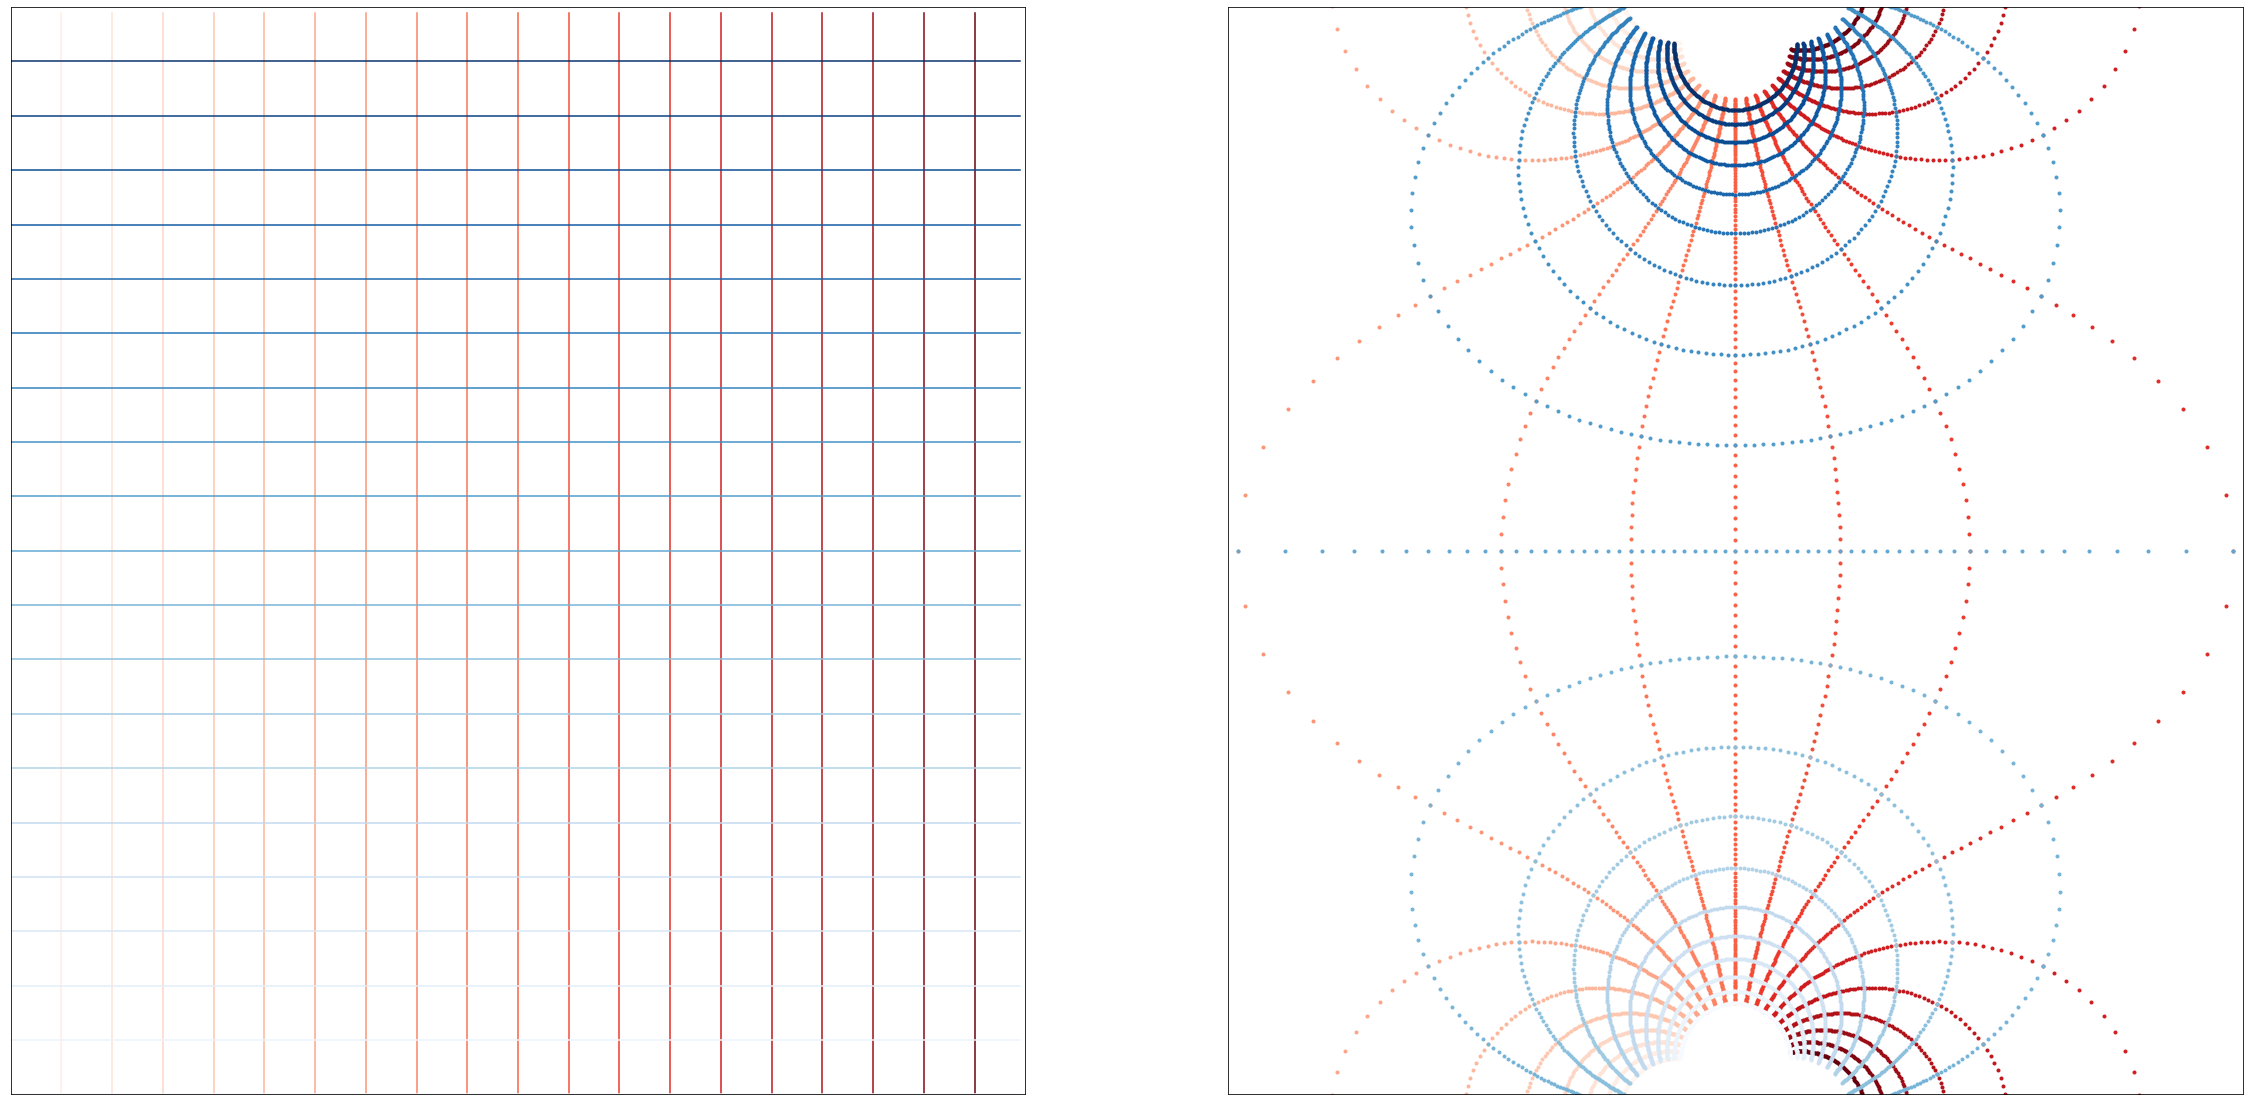

In [83]:
plot_transform(lambda z: 2*cmath.atanh(z))

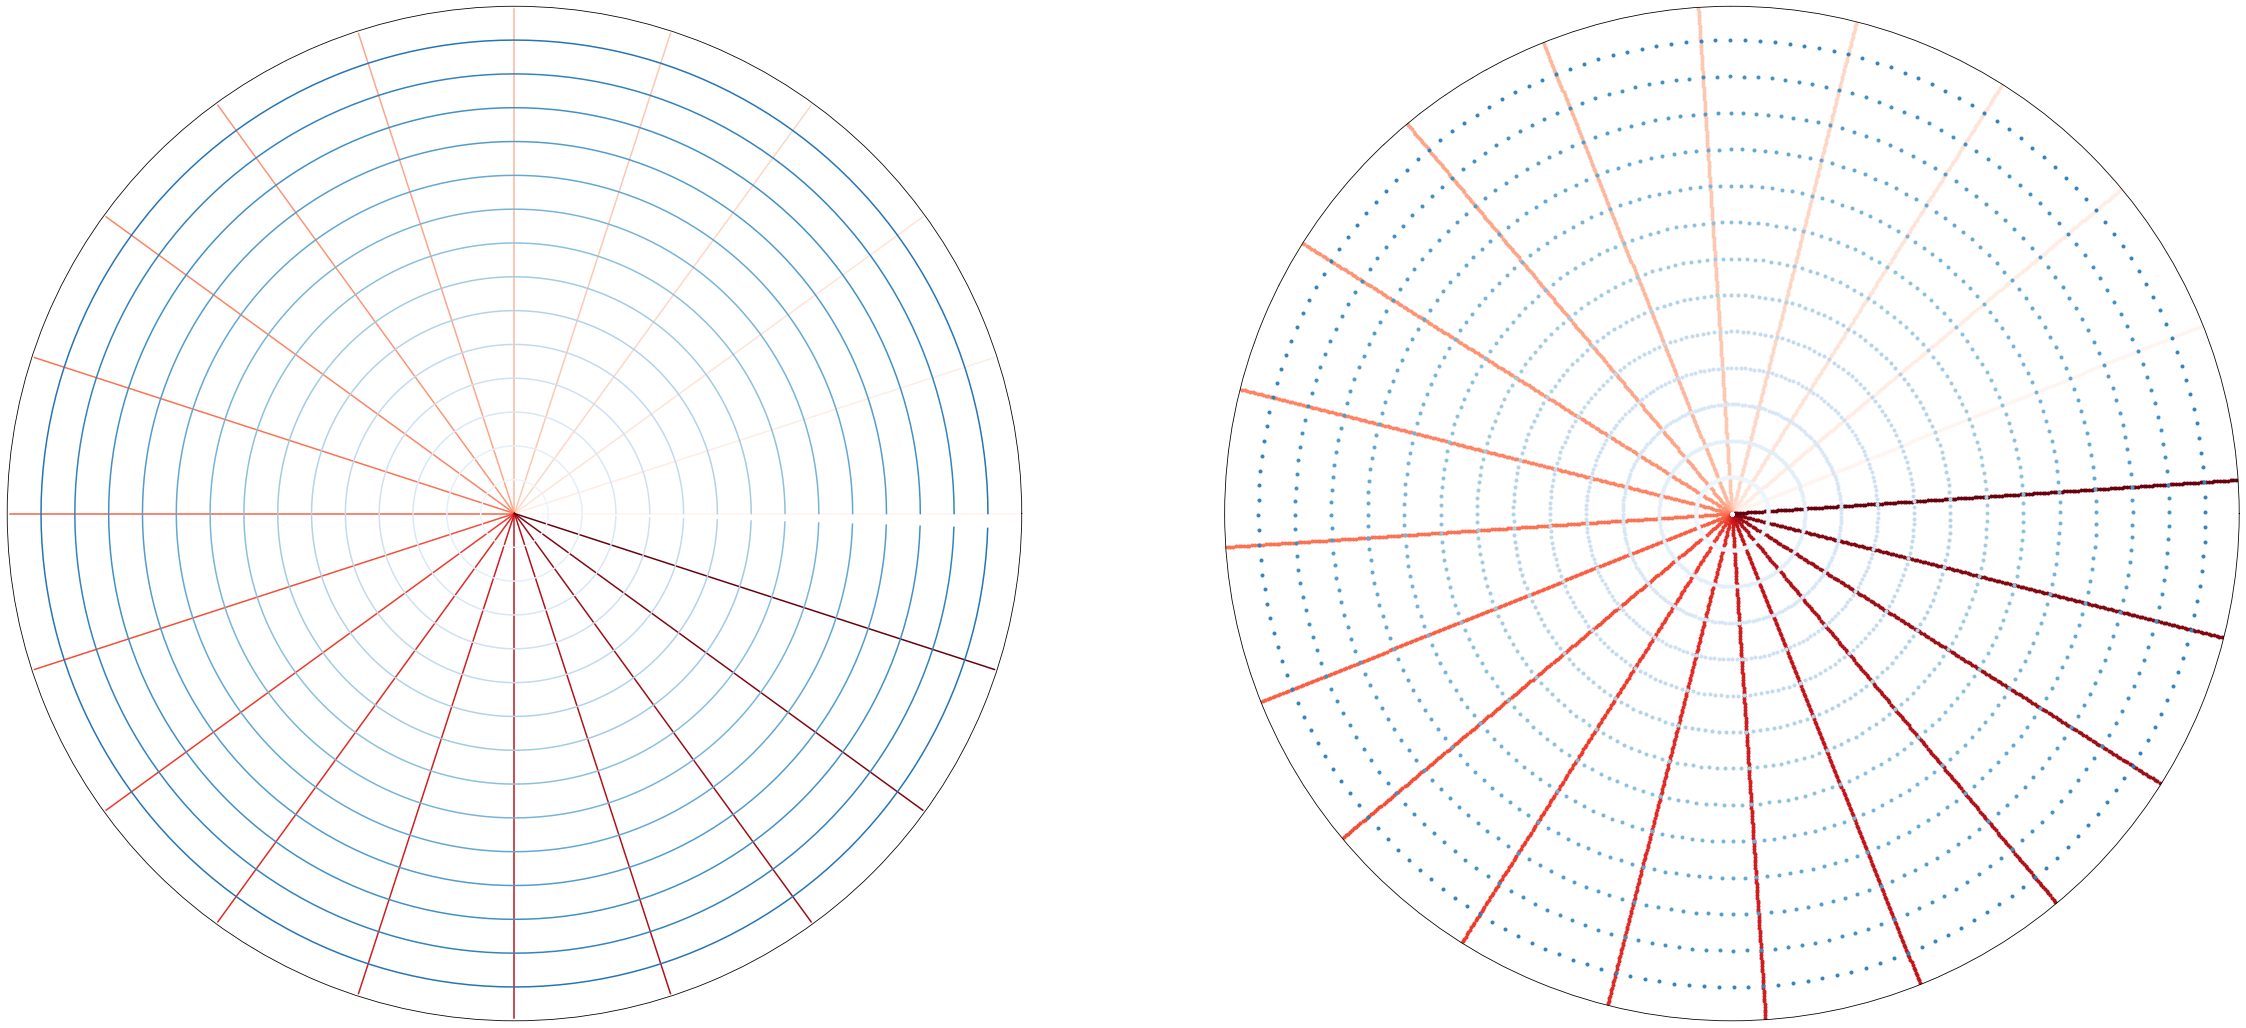

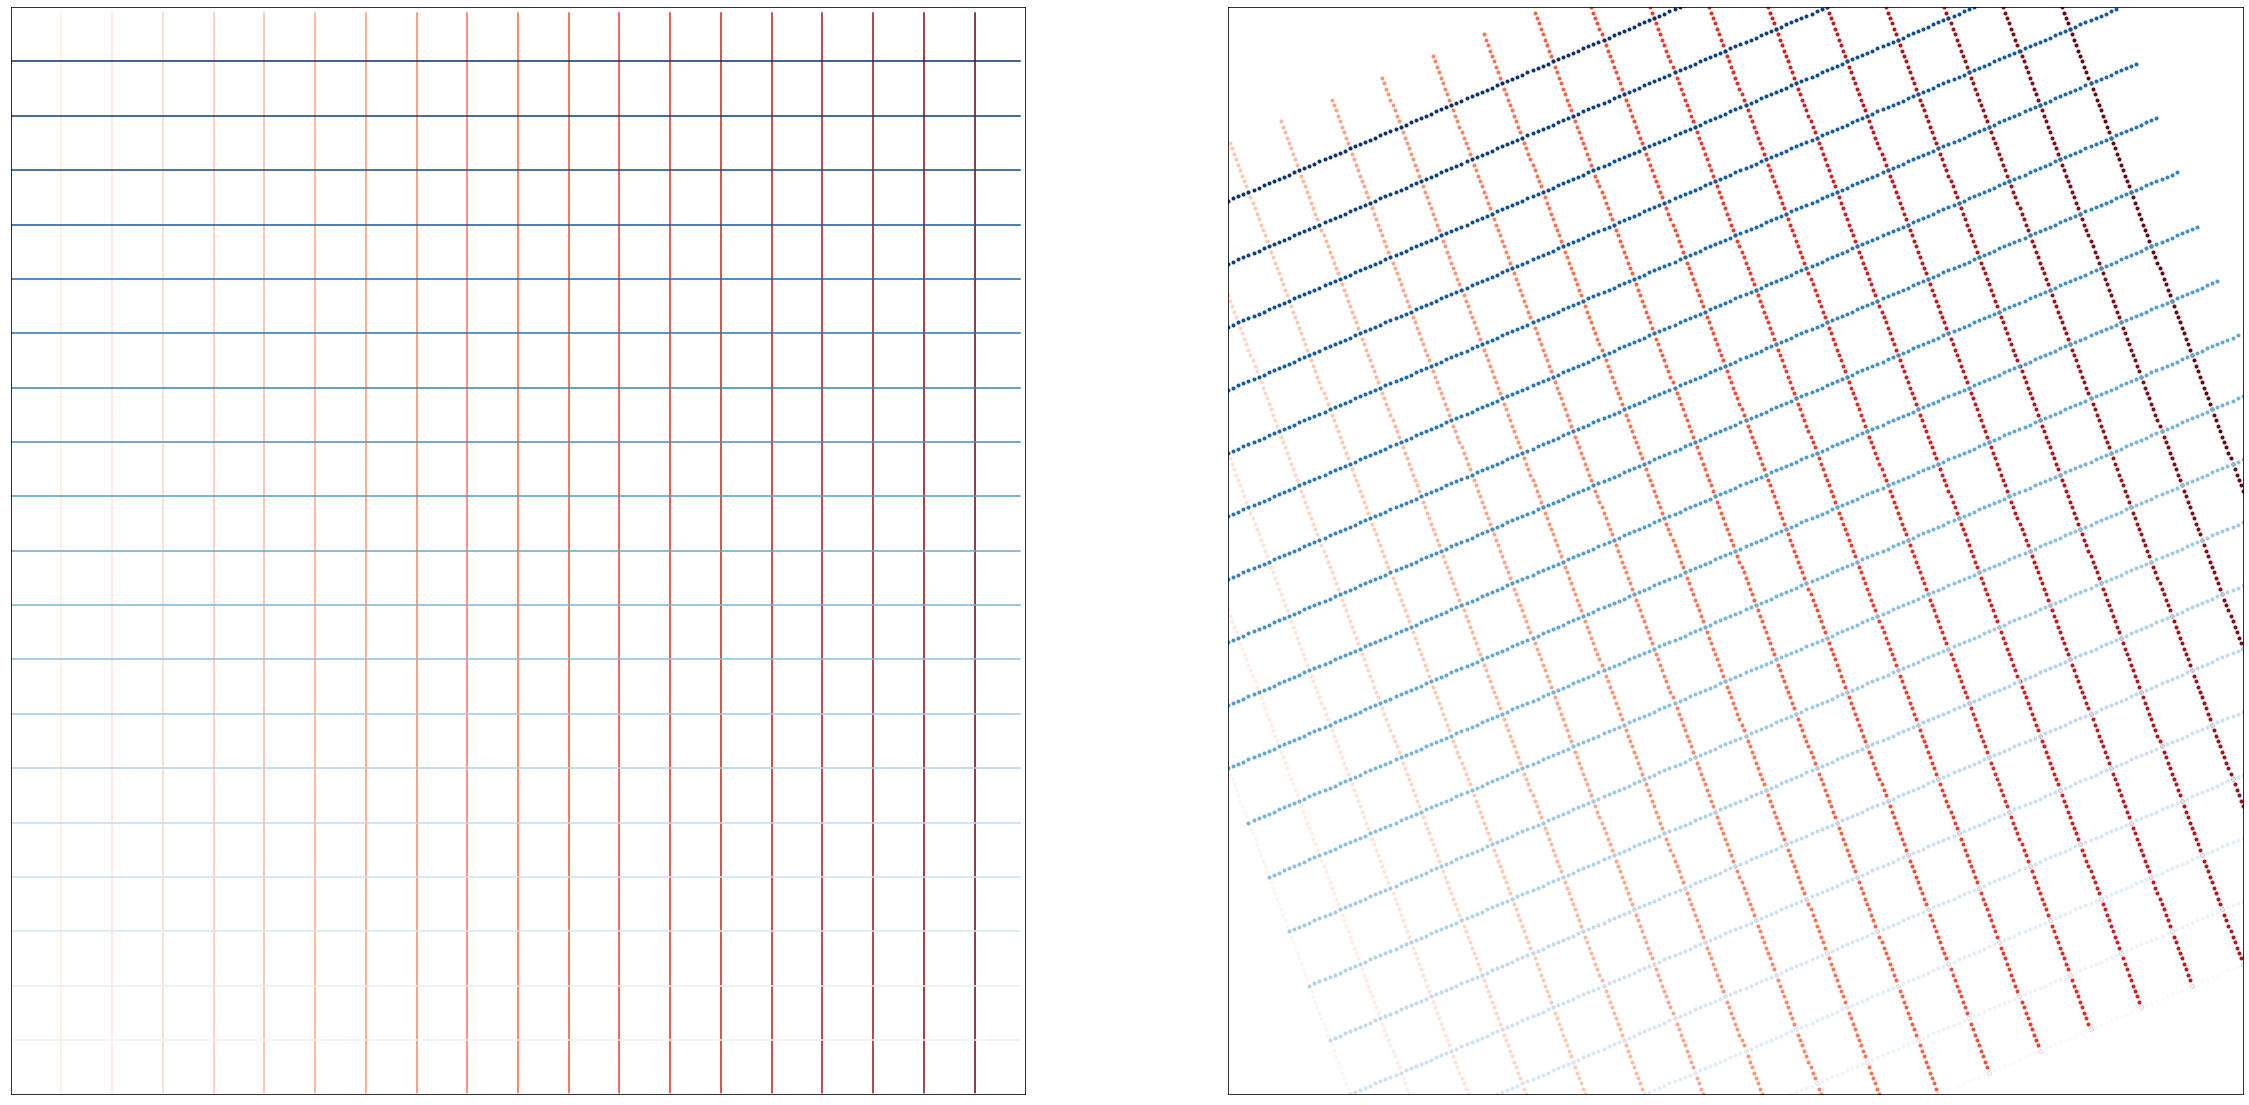

In [84]:
plot_transform(lambda z: complex(1, 0.4) * z)

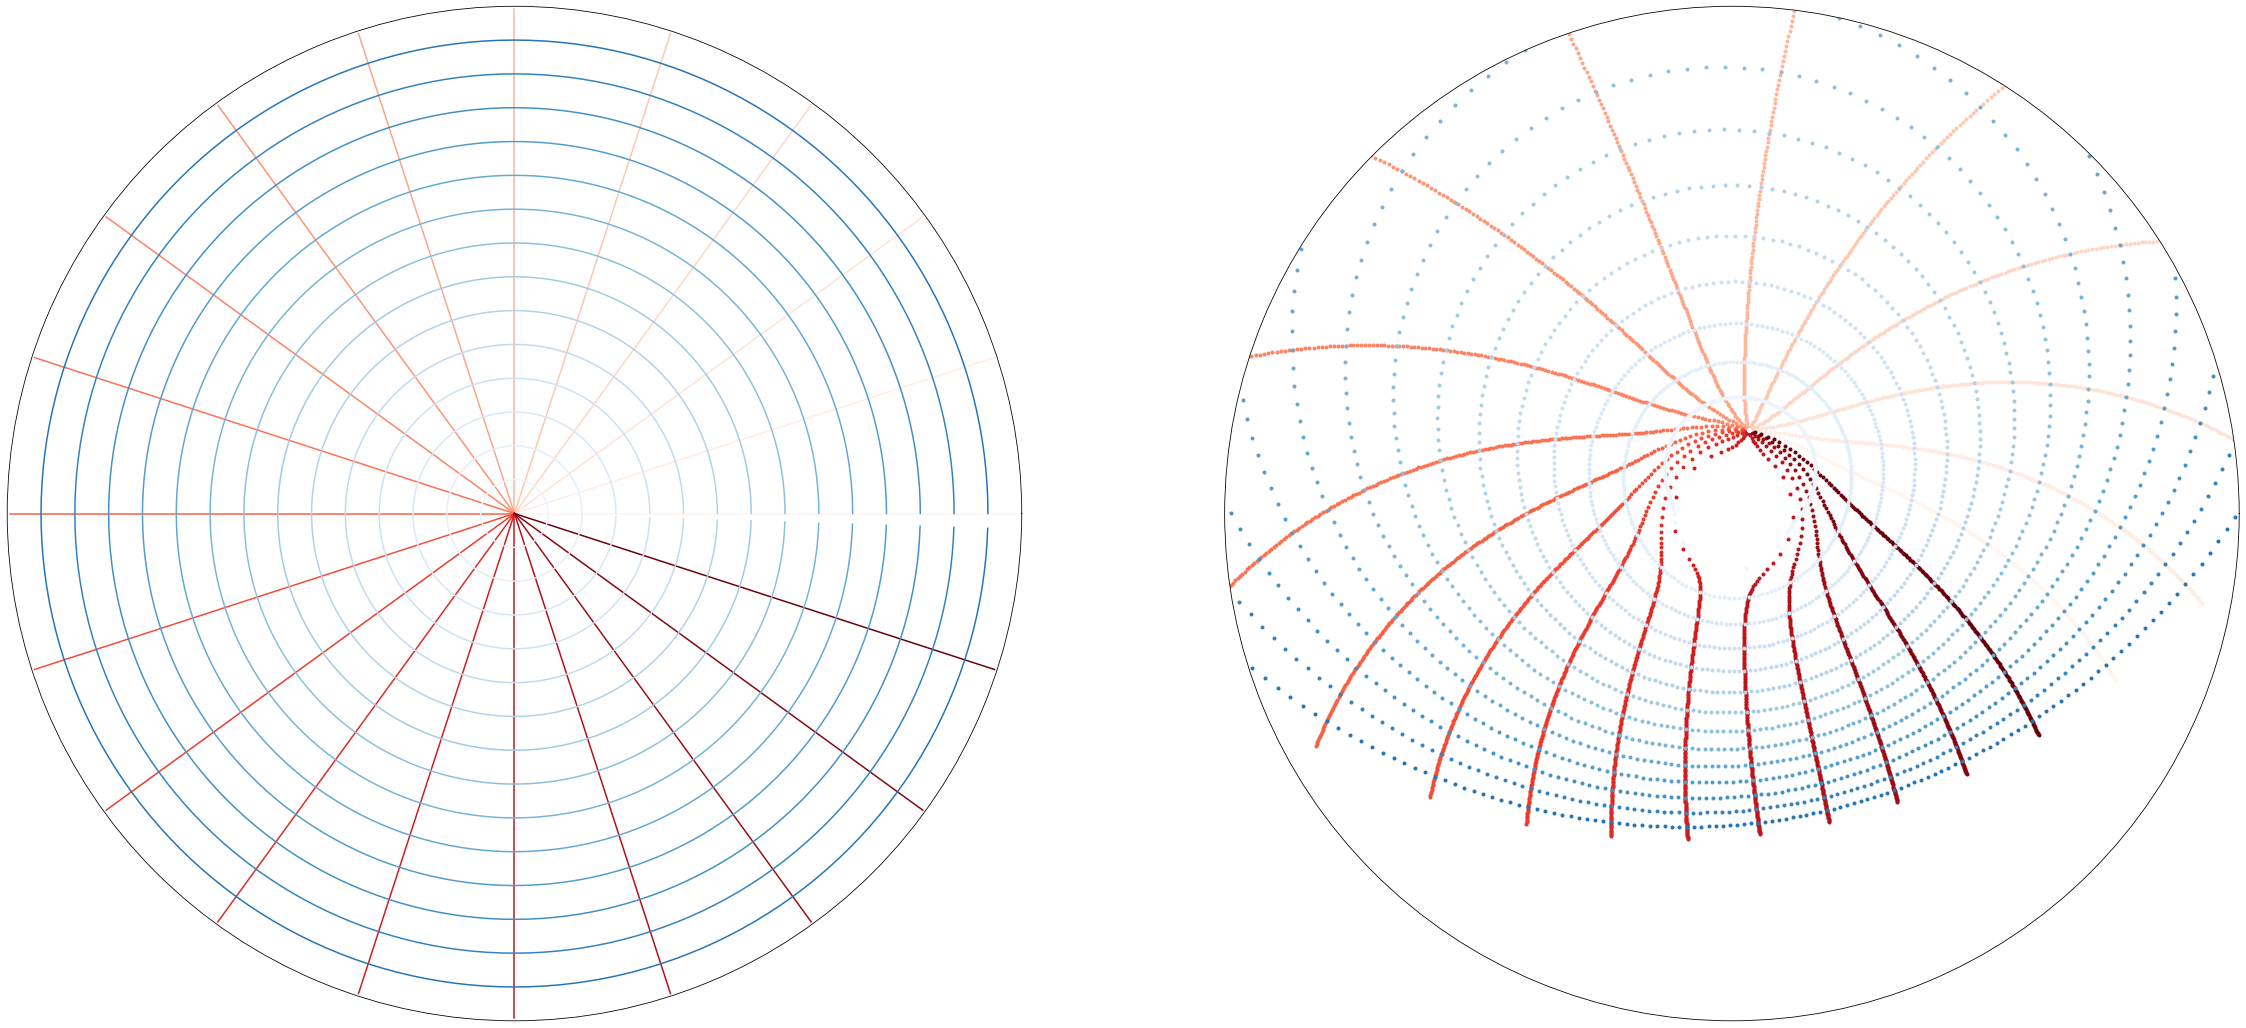

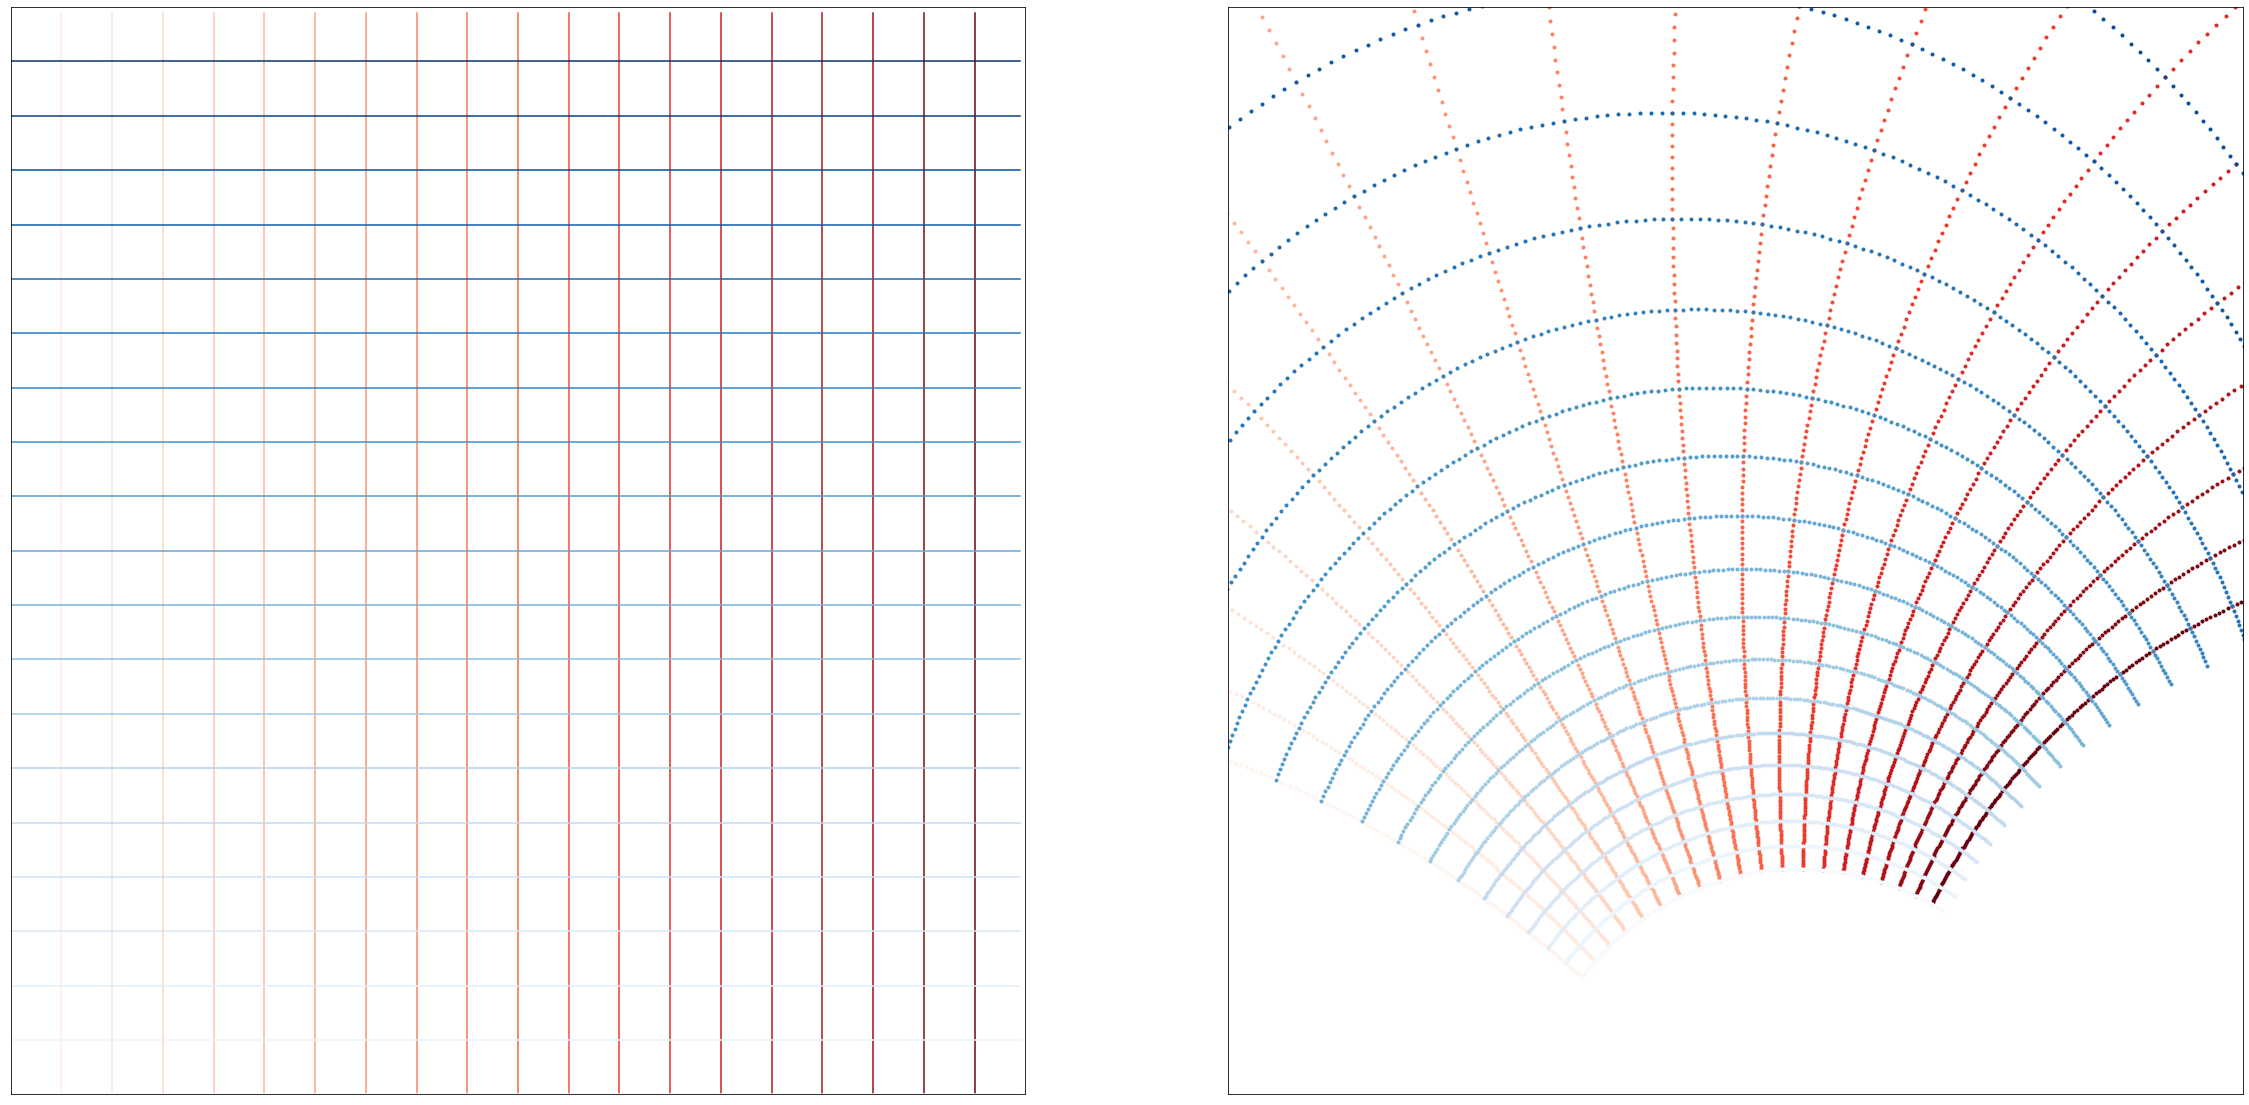

In [85]:
plot_transform(lambda z: (complex(1, -5) * z + 1) / (z + complex(1, -5)))

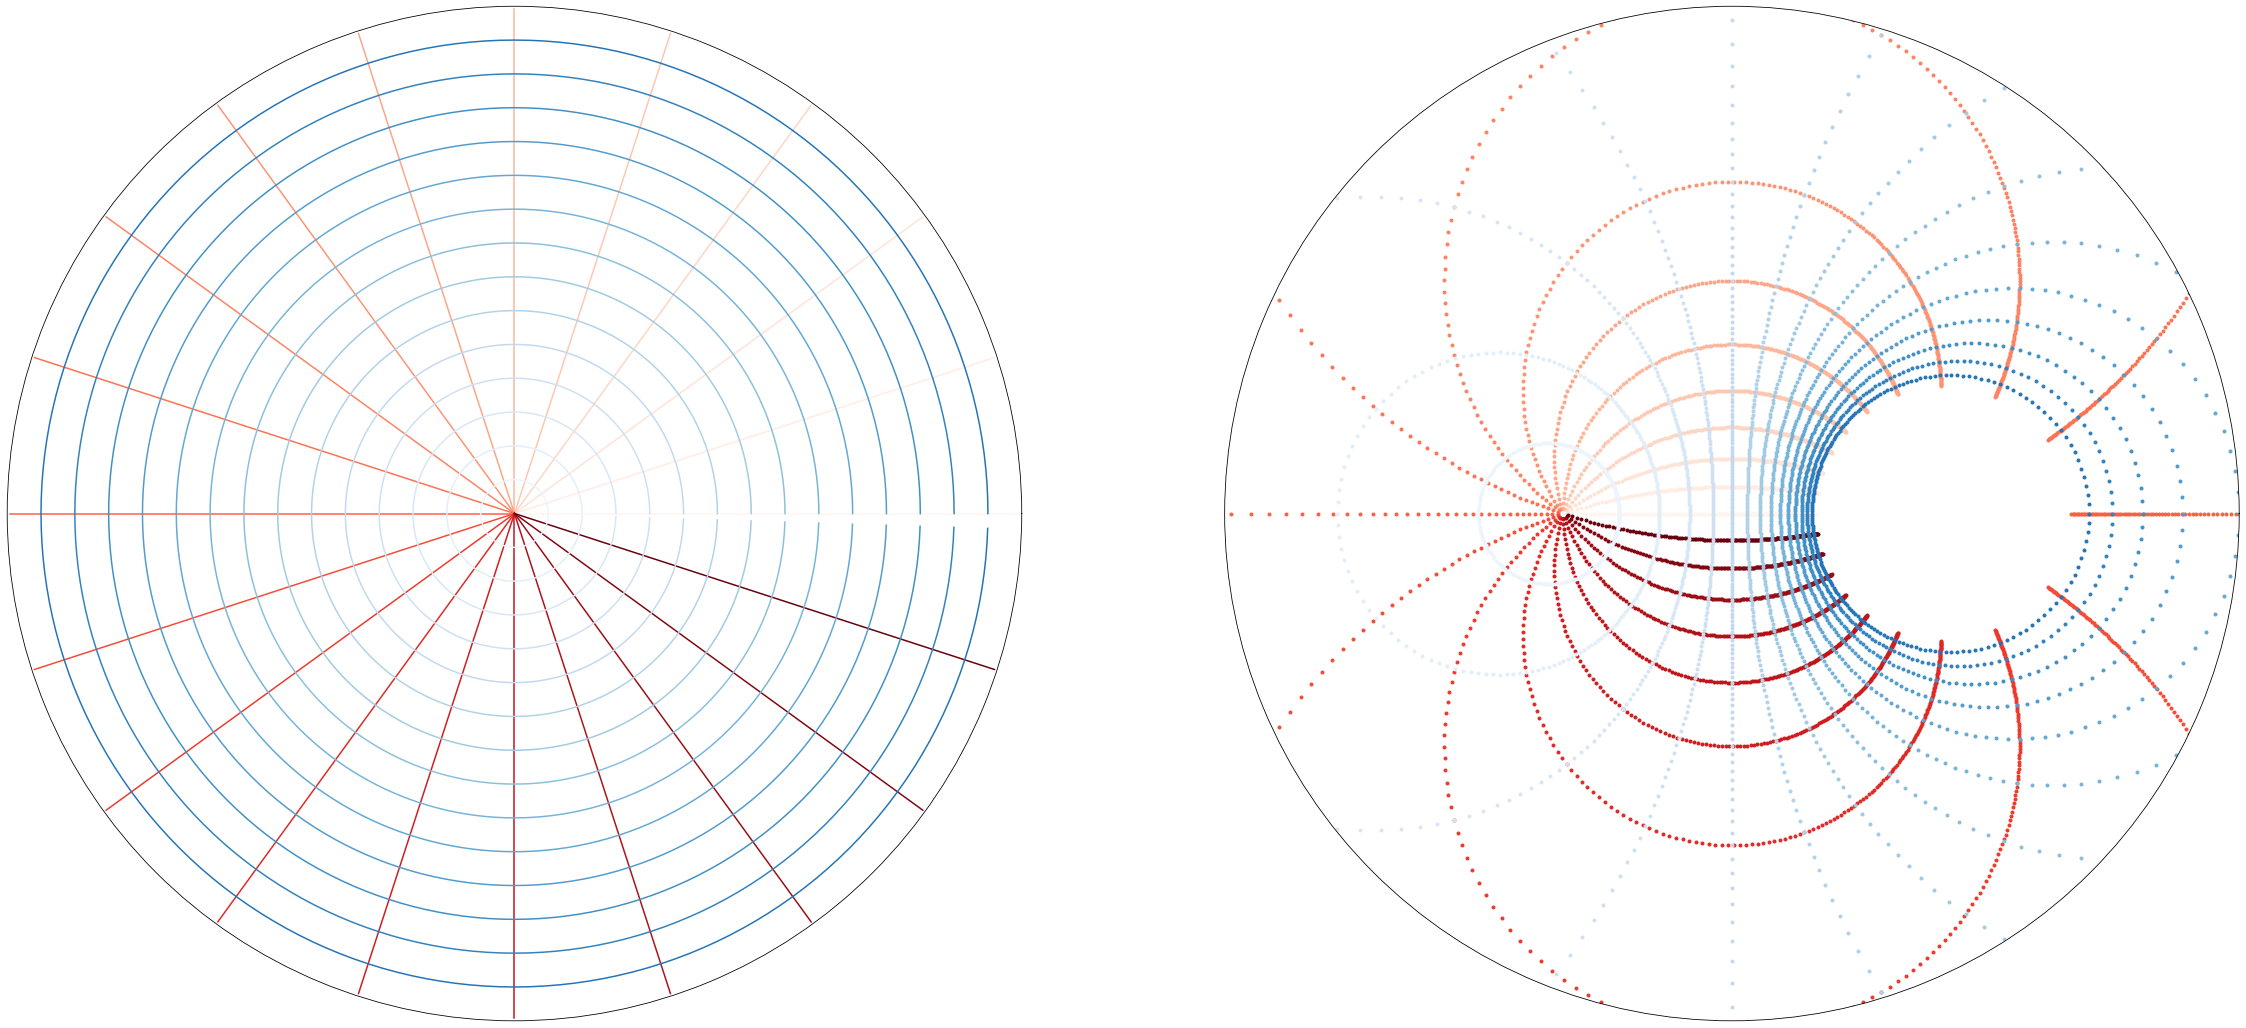

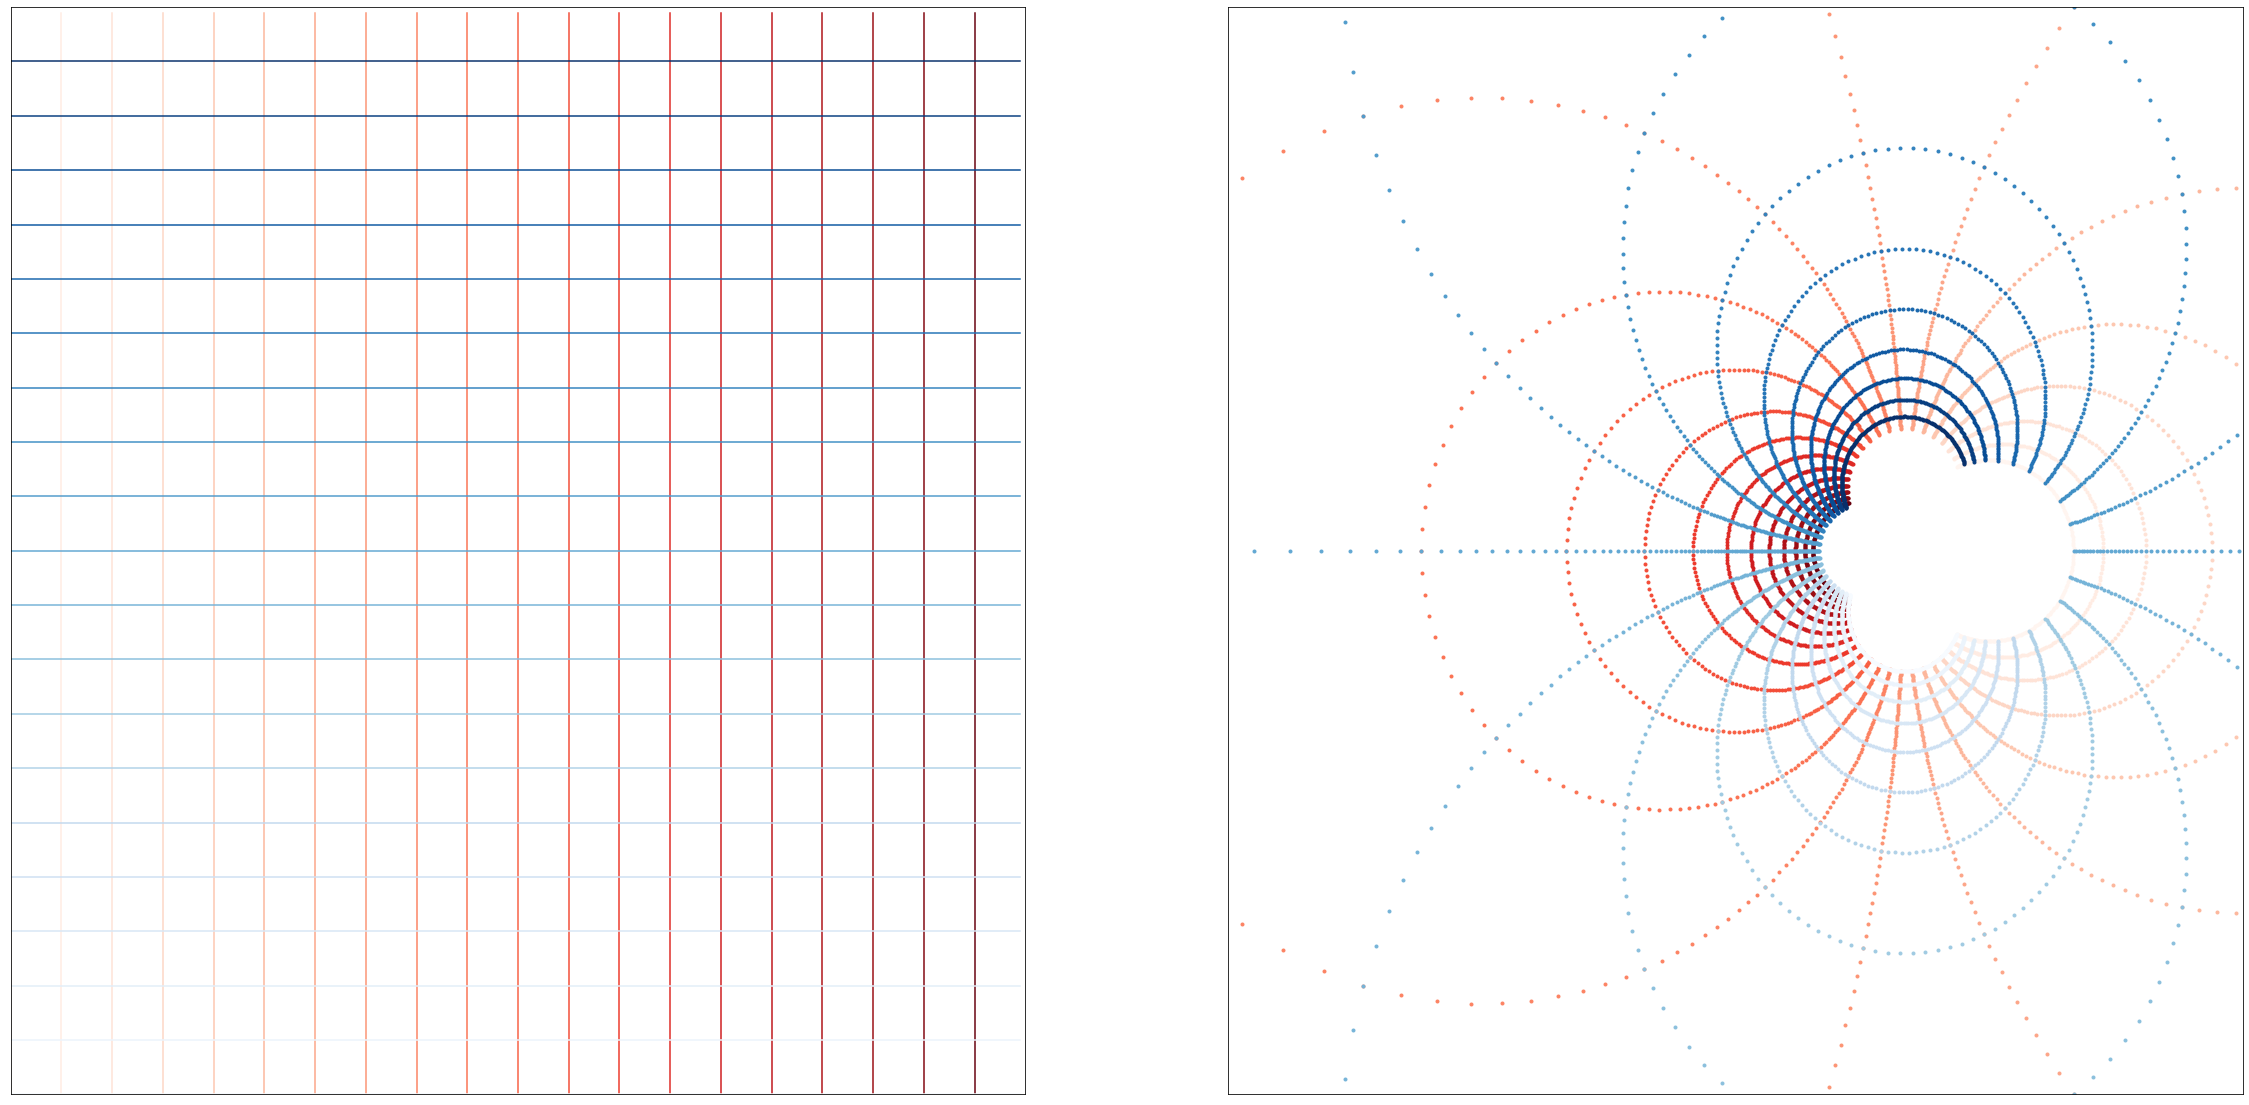

In [86]:
plot_transform(lambda z: (z - 1) / (z + 1))